# Multi-Class Classification with TensorFlow

Using the Keras `Model`, create a neural network with more than one `Dense` layer, to classify documents into one of five subjects - business, entertainment, politics, sports and technology (**supervised learning**).

The dataset comes from the BBC News database of archived articles related to the above subjects.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [3]:
df = pd.read_csv('data/bbc_text_cls.csv')

In [4]:
df.head()

text    labels
0  Ad sales boost Time Warner profit\n\nQuarterly...  business
1  Dollar gains on Greenspan speech\n\nThe dollar...  business
2  Yukos unit buyer faces loan claim\n\nThe owner...  business
3  High fuel prices hit BA's profits\n\nBritish A...  business
4  Pernod takeover talk lifts Domecq\n\nShares in...  business

In [5]:
# Fairly well-balanced classes - no need to check F1-score or AUC score

plt.hist(df['labels']);

In [6]:
#  Infer 'category' datatype and return Series of coded labels (0-4)

df['labels'].astype("category").cat.codes

0       0
1       0
2       0
3       0
4       0
       ..
2220    4
2221    4
2222    4
2223    4
2224    4
Length: 2225, dtype: int8

In [7]:
# Map labels to codes in new 'target' column

df['target'] = df['labels'].astype("category").cat.codes

In [8]:
df.head()

text    labels  target
0  Ad sales boost Time Warner profit\n\nQuarterly...  business       0
1  Dollar gains on Greenspan speech\n\nThe dollar...  business       0
2  Yukos unit buyer faces loan claim\n\nThe owner...  business       0
3  High fuel prices hit BA's profits\n\nBritish A...  business       0
4  Pernod takeover talk lifts Domecq\n\nShares in...  business       0

In [9]:
df_train, df_test = train_test_split(df, test_size=0.3)

## Vectorize text data with TF-IDF



In [10]:
tfidf = TfidfVectorizer(stop_words='english')

# Vectorize both training and test set
X_train = tfidf.fit_transform(df_train['text'])

X_test = tfidf.transform(df_test['text'])

In [12]:
# Grab the target data

y_train = df_train['target']

y_test = df_test['target']

## Build the model

In [13]:
# Store number of classes

K = df['target'].max() + 1

K

5

In [15]:
# Store input dimensions

D = X_train.shape[1]

D

25243

In [16]:
# Build model framework (softmax activation combined with loss function in model compiling)

# Inner layer (25,243 features)
i = Input(shape=(D,))

# Hidden layer - 300 neurons with ReLU activation 
x = Dense(300, activation='relu')(i)

# Outer layer - 5 neurons with hidden layer attached (outputs)
x = Dense(K)(x)

# Set up model with inputs and outputs
model = Model(i, x)

In [18]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 25243)]           0         
                                                                 
 dense (Dense)               (None, 300)               7573200   
                                                                 
 dense_1 (Dense)             (None, 5)                 1505      
                                                                 
Total params: 7,574,705
Trainable params: 7,574,705
Non-trainable params: 0
_________________________________________________________________


In [19]:
# As expected, Inner layer has 25,234 columns and 0 parameters
# Hidden layer has many parameters (approx 7.5 million) - 300 neurons x 25,243 inputs (weights) + 300 bias terms 
# Outer layer has 5 neurons with 1505 parameters

In [20]:
# Compile the model and combine softmax activation with loss function

model.compile(loss=SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

### Remember! TensorFlow does not accept sparse matrix so you must transform vectorized input data to NumPy arrays

In [21]:
X_train = X_train.toarray()

X_test = X_test.toarray()

In [22]:
# Train the model

r = model.fit(X_train, y_train, 
              validation_data=(X_test, y_test), 
              epochs=7, 
              batch_size=128)

Epoch 1/7
13/13 [==============================] - 3s 163ms/step - loss: 1.4594 - accuracy: 0.8465 - val_loss: 1.1738 - val_accuracy: 0.9701
Epoch 2/7
13/13 [==============================] - 2s 136ms/step - loss: 0.9053 - accuracy: 0.9904 - val_loss: 0.7048 - val_accuracy: 0.9775
Epoch 3/7
13/13 [==============================] - 2s 138ms/step - loss: 0.4432 - accuracy: 0.9961 - val_loss: 0.3921 - val_accuracy: 0.9775
Epoch 4/7
13/13 [==============================] - 2s 136ms/step - loss: 0.1962 - accuracy: 0.9974 - val_loss: 0.2433 - val_accuracy: 0.9760
Epoch 5/7
13/13 [==============================] - 2s 136ms/step - loss: 0.0954 - accuracy: 0.9981 - val_loss: 0.1770 - val_accuracy: 0.9790
Epoch 6/7
13/13 [==============================] - 2s 139ms/step - loss: 0.0547 - accuracy: 1.0000 - val_loss: 0.1445 - val_accuracy: 0.9805
Epoch 7/7
13/13 [==============================] - 2s 144ms/step - loss: 0.0360 - accuracy: 1.0000 - val_loss: 0.1262 - val_accuracy: 0.9805


**Remember that you asked for training and test accuracy scores, as well as losses, which means you can plot both off the `History` object.**

In [23]:
# Plot loss per epoch

plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend();

In [24]:
# That's a good shape with good learning rate curve - could add more epochs to see for more optimal minimum value

In [25]:
# Plot accuracy per epoch

plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='val accuracy')
plt.legend();

In [26]:
# Test accuracy stays around 98% throughout, with only a slight increase at the end, again more epochs may help
# Either way, excellent results for predictive model

## Predict with the model and run metrics

In [27]:
predictions = model.predict(X_test)

21/21 [==============================] - 0s 9ms/step


In [28]:
# One-dimensional array of prediction arrays for each sample (n-by-k)

predictions

array([[-0.5864346 ,  1.6748302 , -0.38465542, -0.34556538, -0.8382588 ],
       [-0.6613805 , -0.6459869 , -0.9779143 ,  3.079536  , -0.7734417 ],
       [ 4.6841803 , -1.6300461 , -0.73019177, -0.64680284, -1.1936249 ],
       ...,
       [-0.44119325, -0.6953217 , -0.23505752,  2.0716426 , -0.78461355],
       [ 1.4801656 ,  0.6856505 , -0.4989465 , -1.1158451 , -0.59752774],
       [-0.75165635, -1.2842145 , -0.98530805,  4.242878  , -0.9316737 ]],
      dtype=float32)

**The index value of highest value in each array indicates which label:**

    0 - business
    1 - entertainment
    2 - politics
    3 - sport
    4 - tech
    
You can use the predictions generated straight away to compute AUC score, but to calculate F1-score, you need the targets (0, 1, 2, 3, 4). From each prediction, you can ask for the index value of the highest value (argmax) or of the positive value (> 0).

In [29]:
class_preds = []

for prediction in predictions:
    target = prediction.argmax()
    class_preds.append(target)

In [30]:
class_preds

[1,
 3,
 0,
 0,
 0,
 2,
 3,
 0,
 4,
 4,
 4,
 2,
 2,
 3,
 2,
 2,
 3,
 2,
 0,
 3,
 3,
 0,
 1,
 4,
 2,
 2,
 4,
 0,
 2,
 0,
 4,
 4,
 1,
 4,
 1,
 1,
 0,
 3,
 4,
 2,
 3,
 2,
 4,
 3,
 3,
 3,
 0,
 4,
 4,
 2,
 4,
 4,
 2,
 1,
 4,
 3,
 0,
 3,
 3,
 3,
 3,
 1,
 0,
 1,
 4,
 3,
 3,
 3,
 4,
 3,
 4,
 1,
 0,
 4,
 0,
 4,
 4,
 0,
 3,
 1,
 3,
 0,
 0,
 4,
 2,
 4,
 1,
 1,
 1,
 2,
 0,
 0,
 4,
 0,
 0,
 3,
 1,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 4,
 4,
 3,
 3,
 2,
 0,
 4,
 1,
 4,
 2,
 4,
 4,
 3,
 3,
 1,
 1,
 4,
 3,
 3,
 2,
 0,
 4,
 2,
 3,
 0,
 2,
 0,
 1,
 3,
 1,
 2,
 0,
 2,
 1,
 2,
 2,
 3,
 2,
 0,
 0,
 4,
 0,
 0,
 1,
 0,
 3,
 1,
 3,
 4,
 3,
 0,
 4,
 1,
 0,
 4,
 1,
 0,
 1,
 0,
 3,
 3,
 4,
 0,
 1,
 1,
 1,
 3,
 0,
 1,
 1,
 0,
 1,
 4,
 1,
 0,
 2,
 1,
 3,
 3,
 0,
 4,
 0,
 4,
 0,
 4,
 2,
 3,
 0,
 3,
 1,
 0,
 4,
 1,
 3,
 3,
 4,
 2,
 0,
 0,
 4,
 0,
 1,
 4,
 1,
 3,
 4,
 2,
 4,
 4,
 1,
 2,
 3,
 0,
 4,
 4,
 3,
 4,
 1,
 1,
 0,
 0,
 0,
 2,
 0,
 3,
 3,
 0,
 1,
 0,
 3,
 0,
 3,
 0,
 4,
 1,
 4,
 4,
 2,
 1,
 0,
 0,
 4,
 3,
 1,
 0,
 2,


In [34]:
from sklearn.metrics import f1_score

# Required average parameter must be set to other than 'binary'
print("Test F1 score:", f1_score(y_test, class_preds, average='macro'))

Test F1 score: 0.9802700149659046


In [36]:
# You can even run a confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, class_preds)

In [41]:
# Function to plot multi-label confusion matrix

import seaborn as sns

def plot_cm(cm):
    classes = ['business', 'entertainment', 'politics', 'sport', 'tech'] 
    df_cm = pd.DataFrame(cm, index=classes, columns=classes) 
    ax = sns.heatmap(df_cm, annot=True, fmt='g') 
    ax.set_xlabel("Predicted") 
    ax.set_ylabel("Target")

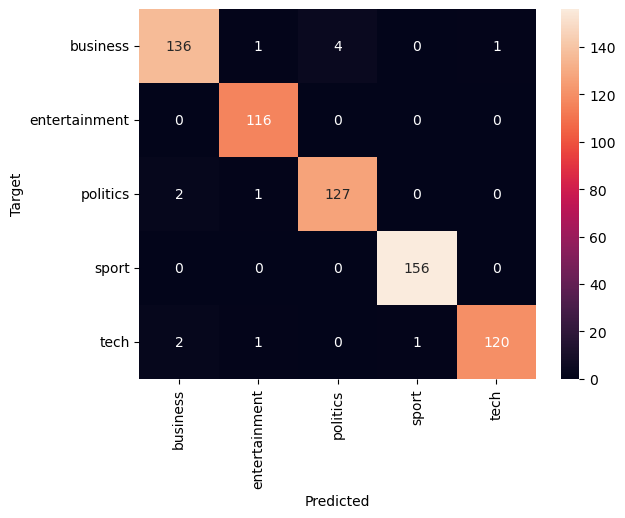

In [42]:
plot_cm(cm)

In [44]:
# Excellent results! Only 13 misclassified articles, which are mostly politics confused for business
# Business articles had the highest number of misclassified labels

# You can isolate the misclassified articles by attaching 

df_test.head()

text         labels  target
761   Rock star sued by ex-girlfriend\n\nMotley Crue...  entertainment       1
1341  Isinbayeva heads for Birmingham\n\nOlympic pol...          sport       3
315   Euronext 'poised to make LSE bid'\n\nPan-Europ...       business       0
305   Retail sales show festive fervour\n\nUK retail...       business       0
56    Economy 'stronger than forecast'\n\nThe UK eco...       business       0

In [45]:
df_test['class_preds'] = class_preds

In [46]:
df_test.head()

text         labels  \
761   Rock star sued by ex-girlfriend\n\nMotley Crue...  entertainment   
1341  Isinbayeva heads for Birmingham\n\nOlympic pol...          sport   
315   Euronext 'poised to make LSE bid'\n\nPan-Europ...       business   
305   Retail sales show festive fervour\n\nUK retail...       business   
56    Economy 'stronger than forecast'\n\nThe UK eco...       business   

      target  class_preds  
761        1            1  
1341       3            3  
315        0            0  
305        0            0  
56         0            0

In [48]:
# As seen in confusion matrix, 13 misclassified articles

df_test[df_test['target'] != df_test['class_preds']]

text    labels  target  \
2076  Fast lifts rise into record books\n\nTwo high-...      tech       4   
2032  Man auctions ad space on forehead\n\nA 20-year...      tech       4   
1008  MP's shock at long lost daughter\n\nLabour MP ...  politics       2   
912   Tsunami debt deal to be announced\n\nChancello...  politics       2   
1937  Games maker fights for survival\n\nOne of Brit...      tech       4   
1967  Football Manager scores big time\n\nFor the pa...      tech       4   
254   Call to overhaul UK state pension\n\nThe UK pe...  business       0   
225   McDonald's to sponsor MTV show\n\nMcDonald's, ...  business       0   
486   World leaders gather to face uncertainty\n\nMo...  business       0   
483   UK young top Euro earnings league\n\nBritish c...  business       0   
165   Crossrail link 'to get go-ahead'\n\nThe £10bn ...  business       0   
503   Aids and climate top Davos agenda\n\nClimate c...  business       0   
1275  Minimum wage increased to £5.05\n\nThe minimum...  politics       2   

      class_preds  
2076            0  
2032            1  
1008            1  
912             0  
1937            0  
1967            3  
254             2  
225             1  
486             2  
483             4  
165             2  
503             2  
1275            0

In [52]:
# View particular misclassified article

import textwrap

def wrap(x):
    return textwrap.fill(x, replace_whitespace=False, fix_sentence_endings=True)

In [54]:
# This business article was confused for politics

print(wrap(df_test.loc[254, 'text']))

Call to overhaul UK state pension

The UK pension system has been
branded inadequate and too complex by a leading retirement think-tank.
The Pensions Policy Institute (PPI) said replacing the state pension
with a "citizen's pension" would help tackle inequality and
complexity.  The change would see pensions being calculated on length
of residency in the UK rather than National Insurance (NI)
contributions.  Reform could reduce poverty by aiding people with
broken employment records.

The PPI added that once the state system
was reformed the government should look at options to overhaul private
and workplace pensions.  The think tank's proposals were made in
response to the recent publication of the Pensions Commission's
initial report into UK retirement savings.  According to the Pensions
Commission's report 12 million working people are not saving enough
for their retirement.  As a result, living standards could fall for
the next generation of UK pensioners.  The report added that a
c

In [55]:
# This business article was confused for entertainment

print(wrap(df_test.loc[225, 'text']))

McDonald's to sponsor MTV show

McDonald's, the world's largest
restaurant chain, is to sponsor a programme on music channel MTV as
part of its latest youth market promotion.

The show Advance Warning
highlights new talent and MTV reckons it will give McDonald's access
to nearly 400 million homes in 162 countries.  McDonald's golden
arches, name and "I'm loving it" catchphrase will be used throughout
the half-hour programme.  The move comes amid growing concerns about
obesity in Europe and the US.

The European Union has called on the
food industry to reduce the number of adverts aimed at young children,
warning that legislation would be introduced.  unless voluntary steps
were taken.  In the US, food group Kraft is among firms that already
have cut back on promoting sugar and fattening products to the young.
McDonalds has also been taking steps to improve its junk food
reputation, revamping its menu and providing clients with health-
related products such as pedometers.  As well as bu

## Check the learned parameters from model layers

In [56]:
# Find most influential words for each label, i.e. use get_weights

model.layers

In [57]:
# Obtain weights from final layer (not the bias)

w = model.layers[2].get_weights()[0]

In [60]:
# Each word has 5 weights for each class - there are 300 rows for 300 WHAT...FEATURES???

w

array([[-0.14886107, -0.08869483,  0.17905658, -0.12873085,  0.08010814],
       [-0.16054328,  0.17736025,  0.17918675, -0.12316585, -0.10174555],
       [-0.19370745,  0.05766146, -0.13065067,  0.1157812 , -0.1889775 ],
       ...,
       [ 0.14748302, -0.1676077 ,  0.08084109, -0.20748575, -0.13213728],
       [ 0.19446655, -0.10544166, -0.07180309, -0.03484609,  0.17651525],
       [ 0.16881374, -0.17027643, -0.12667981,  0.06401276,  0.17280293]],
      dtype=float32)

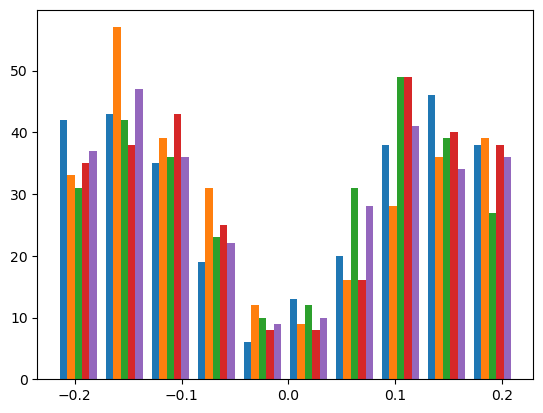

In [61]:
# Plot distribution of class weights to assess good threshold

plt.hist(w);

In [62]:
# Each class (blue, yellow, green, red, purple) shows its weights per word, and the distributions are very similar
# Not surprisingly, there are few words around zero mark, i.e. words that have less influence on classifying the article

In [63]:
# Obtain word-to-index mapping from vectorizer - CREATE MAPPING MANUALLY!!!

word_index_map = tfidf.vocabulary_

In [66]:
threshold = 0.15

print("Most postively influential words for business articles:\n")

word_weights_tuples = []

for word, index in word_index_map.items():
    weight = w[index, 0] 
    if weight > threshold:
        word_weight_tuples.append((word, weight))

word_weight_tuples = sorted(word_weight_tuples, key=lambda x: -x[1])

for i in range(10):
    word, weight = word_weight_tuples[i] 
    print(word, weight)

Most postively influential words for business articles:



IndexError: index 2194 is out of bounds for axis 0 with size 300

In [ ]:
print("Most postively influential words for entertainment articles:\n")

word_weights_tuples = []

for word, index in word_index_map.items():
    weight = w[index, 1] 
    if weight > threshold:
        word_weight_tuples.append((word, weight))

word_weight_tuples = sorted(word_weight_tuples, key=lambda x: -x[1])

for i in range(10):
    word, weight = word_weight_tuples[i] 
    print(word, weight)

In [ ]:
print("Most postively influential words for politics articles:\n")

word_weights_tuples = []

for word, index in word_index_map.items():
    weight = w[index, 2] 
    if weight > threshold:
        word_weight_tuples.append((word, weight))

word_weight_tuples = sorted(word_weight_tuples, key=lambda x: -x[1])

for i in range(10):
    word, weight = word_weight_tuples[i] 
    print(word, weight)

In [ ]:
print("Most postively influential words for sports articles:\n")

word_weights_tuples = []

for word, index in word_index_map.items():
    weight = w[index, 3] 
    if weight > threshold:
        word_weight_tuples.append((word, weight))

word_weight_tuples = sorted(word_weight_tuples, key=lambda x: -x[1])

for i in range(10):
    word, weight = word_weight_tuples[i] 
    print(word, weight)

In [ ]:
print("Most postively influential words for tech articles:\n")

word_weights_tuples = []

for word, index in word_index_map.items():
    weight = w[index, 4] 
    if weight > threshold:
        word_weight_tuples.append((word, weight))

word_weight_tuples = sorted(word_weight_tuples, key=lambda x: -x[1])

for i in range(10):
    word, weight = word_weight_tuples[i] 
    print(word, weight)